<a href="https://colab.research.google.com/github/TithiSreemany/Stock-Price-Forcasting-using-LSTM/blob/main/StockPriceForcastingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock Price Forcasting LSTM**



### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [16]:
!pip install sklearn

### Loading the Dataset

In [3]:
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [6]:
df = df.sort_values(by="Date")

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [8]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0       155.80
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230    230.90
1231    227.60
1232    218.20
1233    209.20
1234    215.15
Name: Close, Length: 1235, dtype: float64

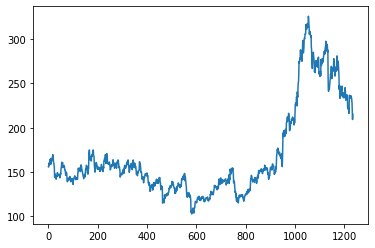

In [11]:
plt.plot(df1)

### Scaling the data

In [20]:
#Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.23823398]
 [0.2371134 ]
 [0.25773196]
 ...
 [0.51792918]
 [0.47758853]
 [0.50425818]]


### Splitting the dataset into training and test set

In [22]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(802, 433)

### Preprocessing the training and test data 

In [26]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)
#Format (no of records, 100 timestamps)

(701, 100)
(701,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [30]:
# reshape input into a 3 dimentional array of the format [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Creating a Stacked LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 307ms/step - loss: 0.0099 - val_loss: 0.1012
Epoch 2/100
11/11 [==============================] - 2s 187ms/step - loss: 0.0029 - val_loss: 0.0519
Epoch 3/100
11/11 [==============================] - 2s 185ms/step - loss: 0.0022 - val_loss: 0.0675
Epoch 4/100
11/11 [==============================] - 2s 186ms/step - loss: 0.0014 - val_loss: 0.0197
Epoch 5/100
11/11 [==============================] - 2s 187ms/step - loss: 0.0010 - val_loss: 0.0056
Epoch 6/100
11/11 [==============================] - 2s 186ms/step - loss: 9.4152e-04 - val_loss: 0.0048
Epoch 7/100
11/11 [==============================] - 2s 185ms/step - loss: 9.1533e-04 - val_loss: 0.0048
Epoch 8/100
11/11 [==============================] - 2s 184ms/step - loss: 8.9600e-04 - val_loss: 0.0068
Epoch 9/100
11/11 [==============================] - 2s 188ms/step - loss: 8.6506e-04 - val_loss: 0.0057
Epoch 10/100
11/11 [==============================] - 2s 186ms/step - loss:

### Predicting the Results

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

###Performance of Model

In [36]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

139.88796516777313

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

237.2692719277122

### Plotting Predicted Results

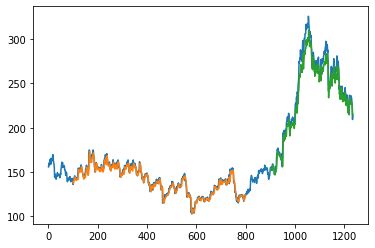

In [38]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



> blue graph - Actual Data Set

> orange graph - Predicted results for training data set

> green graph - Predicted results for test data set




### Predicting the Future Stock Price for the following Month (next 30 Days)

In [39]:
len(test_data)

433

In [79]:
#Taking the last 100 days values as input to predic future values
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=1
while(i<=30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input \n{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output {}\n\n".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.48423368]
101
2 day input 
[0.62057373 0.64926042 0.63671    0.63155536 0.64769162 0.66136262
 0.68063649 0.69565217 0.7082026  0.69408337 0.72545944 0.74652622
 0.71985657 0.68399821 0.72209771 0.7310623  0.7371134  0.73644106
 0.7218736  0.73935455 0.74831914 0.78507396 0.75974899 0.77409234
 0.73688929 0.70909906 0.69722098 0.71470193 0.72545944 0.73823398
 0.73038996 0.72299417 0.74719857 0.72523532 0.7994173  0.78283281
 0.75571493 0.73352757 0.77364411 0.77140296 0.7492156  0.72859704
 0.70035858 0.63021067 0.65105334 0.60959211 0.58471537 0.609368
 0.63043478 0.64388167 0.6017481  0.61160914 0.62572837 0.62550426
 0.64657104 0.59614523 0.59524877 0.59166293 0.61340206 0.6048857
 0.59928283 0.60354101 0.58673241 0.5912147  0.60466159 0.61272972
 0.62909009 0.63872703 0.61810847 0.59524877 0.57530255 0.60242044
 0.58583595 0.5912147  0.59771403 0.59009413 0.60085164 0.5425818
 0.53675482 0.53070372 0.53922008 0.5349619  0.50806813 0.53787539
 0.58852532 0.60040341 0.59345585 0.

In [82]:
print(lst_output)

[[0.48423367738723755], [0.48652008175849915], [0.4824761748313904], [0.4757385551929474], [0.46684786677360535], [0.4566631019115448], [0.44629621505737305], [0.43669140338897705], [0.4284026026725769], [0.4215683043003082], [0.41601166129112244], [0.41138774156570435], [0.4073181450366974], [0.4034847915172577], [0.3996756970882416], [0.3957911729812622], [0.3918229043483734], [0.38781729340553284], [0.3838408291339874], [0.3799504041671753], [0.3761770725250244], [0.3725227415561676], [0.36896368861198425], [0.365462064743042], [0.3619753122329712], [0.35846570134162903], [0.3549059331417084], [0.35128074884414673], [0.3475862443447113], [0.34382742643356323]]


In [83]:
print("The output for the upcoming 30 days is :")
print(scaler.inverse_transform(lst_output))

The output for the upcoming 30 days is :
[[210.68253343]
 [211.19263024]
 [210.2904346 ]
 [208.78727166]
 [206.80375908]
 [204.53153804]
 [202.21868558]
 [200.0758521 ]
 [198.22662066]
 [196.70188869]
 [195.46220163]
 [194.43060514]
 [193.52267816]
 [192.66745699]
 [191.81764802]
 [190.95101069]
 [190.06568996]
 [189.17203816]
 [188.28488898]
 [187.41693517]
 [186.57510488]
 [185.75982364]
 [184.96579893]
 [184.18458664]
 [183.40669216]
 [182.62369797]
 [181.82951368]
 [181.02073507]
 [180.19649111]
 [179.35789884]]


### Plotting the Future Stock Prices for the following 30 Days

In [84]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [85]:
len(df1)

1235

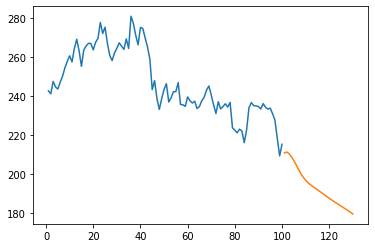

In [86]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

> Blue Graph - Stock Price of Last 100 days of the given Dataset

> Orange Graph - Future Stock Prices of the following 30 days

### Final Predicted Future Trend of Stock Prices

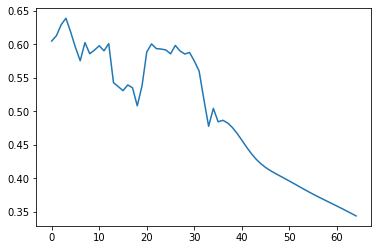

In [87]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])